# Data Preparation

# 1. Importing the dataset

In [1]:
# Importing pandas library for data manipulation and analysis
import pandas as pd 
# Reading the CSV file and storing it in a variable "df"
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv",low_memory=False)
# Shape of the data set
print(df.shape)
print("Imported the dataset sucessfully")

(300698, 53)
Imported the dataset sucessfully


# 2. Insight on the information and details that the provided dataset carries

In [2]:
# getting information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [3]:
# To display all the columns
pd.set_option('display.max_columns', None)
# Printing top 3 values
print(df.head(3))

   Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   
2  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip       Incident Address       Street Name  \
0  Street/Sidewalk       10034.0    71 VERMILYEA AVENUE  VERMILYEA AVENUE   
1  Street/Sidewalk       11105.0        27-07 23 AVENUE         23 AVENUE   
2  Street/Sidewalk       10458.0  2897 VALENTINE AVENUE  VALENTINE AVENUE   

    Cross Street 1   Cross Street 2 Intersection Street 1  \
0   ACADEMY STREET  WEST 204 STREET                 

# 3. Converting 'Created Date' and 'Closed Date' to datetime data type. Creating a new column "Request_Closing_Time" as the time elapsed between request creation and request closing.


In [4]:
# checking data type of 'Created Date' and 'Closing Date'
df[['Created Date','Closed Date']].dtypes

Created Date    object
Closed Date     object
dtype: object

In [5]:
# converting 'Created Date' and 'Closed Date' to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

# Calculating the request closing time in hours
df["Request_Closing_Time"] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600
print(df[['Created Date', 'Closed Date', 'Request_Closing_Time']].head())

# Checking data type of 'Created Date', Closing Date' and 'Request_Closing_Time' after converting
df[['Created Date','Closed Date','Request_Closing_Time']].dtypes

C:\Users\acer\AppData\Local\Temp\ipykernel_29996\1252467811.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'])
C:\Users\acer\AppData\Local\Temp\ipykernel_29996\1252467811.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'])


         Created Date         Closed Date  Request_Closing_Time
0 2015-12-31 23:59:45 2016-01-01 00:55:00              0.920833
1 2015-12-31 23:59:44 2016-01-01 01:26:00              1.437778
2 2015-12-31 23:59:29 2016-01-01 04:51:00              4.858611
3 2015-12-31 23:57:46 2016-01-01 07:43:00              7.753889
4 2015-12-31 23:56:58 2016-01-01 03:24:00              3.450556


Created Date            datetime64[ns]
Closed Date             datetime64[ns]
Request_Closing_Time           float64
dtype: object

# 4. Dropping irrelevant Columns

In [6]:
# List of columns to drop
columns_to_drop = [ 'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 
                   'Intersection Street 2', 'Address Type', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 
                   'School Region', 'School Code', 'School Phone Number','School Address', 'School City', 'School State', 'School Zip', 
                   'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 
                   'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 
                   'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
                   'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location']

# Dropping the irrelevant columns
df.drop(columns=columns_to_drop, inplace=True)

# Checking output after dropping columns
print(df.head(3))
print(df.shape)

   Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   

            Complaint Type        Descriptor    Location Type  Incident Zip  \
0  Noise - Street/Sidewalk  Loud Music/Party  Street/Sidewalk       10034.0   
1         Blocked Driveway         No Access  Street/Sidewalk       11105.0   
2         Blocked Driveway         No Access  Street/Sidewalk       10458.0   

       City  Status                             Resolution Description  \
0  NEW YORK  Closed  The Police Department responded and upon arriv...   
1   ASTORIA  Closed  The Police Department responded to the complai...   
2     BRONX  Closed  The Police Department responded and upon arriv...   

     Borough   Latitude  Longitude  Request_Closing_Time  
0  MANHATTAN  40.865682 -73.923501              0.920833  
1     QUEEN

In [7]:
# Getting info about the new data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              300698 non-null  int64         
 1   Created Date            300698 non-null  datetime64[ns]
 2   Closed Date             298534 non-null  datetime64[ns]
 3   Agency                  300698 non-null  object        
 4   Complaint Type          300698 non-null  object        
 5   Descriptor              294784 non-null  object        
 6   Location Type           300567 non-null  object        
 7   Incident Zip            298083 non-null  float64       
 8   City                    298084 non-null  object        
 9   Status                  300698 non-null  object        
 10  Resolution Description  300698 non-null  object        
 11  Borough                 300698 non-null  object        
 12  Latitude                297158

# 5. Removing the NaN missing values from updated dataframe.

In [8]:
# Checking the nan values per column
nan_counts_per_column = df.isna().sum()
print(nan_counts_per_column)

# Dataframe before removing NaN values
print(df.shape) 

# Removing the NaN missing values
df= df.dropna()

print(df.shape)

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64
(300698, 15)
(291107, 15)


# Data Analysis

# 1. Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame.

In [9]:
# Creating a new list of only the numeric columns of the data frame
numeric_cols = df.select_dtypes(include='number').columns
print(numeric_cols)

Index(['Unique Key', 'Incident Zip', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')


In [10]:
# Importing required libraries
from scipy.stats import skew, kurtosis

# Creating a new dataframe for the summary statistics
summary_stats = pd.DataFrame({
    'Sum': df[numeric_cols].sum(),
    'Mean': df[numeric_cols].mean(),
    'Standard Deviation': df[numeric_cols].std(),
    'Skewness': df[numeric_cols].apply(skew),
    'Kurtosis': df[numeric_cols].apply(kurtosis)
})

summary_stats

,Sum,Mean,Standard Deviation,Skewness,Kurtosis
Unique Key,9.112108e+12,3.130158e+07,575377.738707,0.016898,-1.176593
Incident Zip,3.160833e+09,1.085798e+04,580.280774,-2.553943,37.827107
Latitude,1.185553e+07,4.072568e+01,0.082411,0.123114,-0.734826
Longitude,-2.152010e+07,-7.392504e+01,0.078654,-0.312737,1.455555
Request_Closing_Time,1.254358e+06,4.308926e+00,6.062641,14.299452,849.762465


# 2.Python program to calculate and show correlation of all variables.

In [11]:
# Showing the correaltion between variables 
print("Correlation Matrix")
# Selecting only the numeric columns from the DataFrame and calculate the correlation matrix.
df.select_dtypes(include = 'number').corr()

Correlation Matrix


,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
Unique Key,1.000000,0.025492,-0.032613,-0.008621,0.053126
Incident Zip,0.025492,1.000000,-0.499081,0.385934,0.057182
Latitude,-0.032613,-0.499081,1.000000,0.368819,0.024497
Longitude,-0.008621,0.385934,0.368819,1.000000,0.109724
Request_Closing_Time,0.053126,0.057182,0.024497,0.109724,1.000000


# Data Exploration

# 1. Top 10 most common camplaint type

In [12]:
# Importing mathplotlib for making diagrams
import matplotlib.pyplot as plt

In [13]:
# Getting the top 10 complain types
complaint_counts = df['Complaint Type'].value_counts().nlargest(10)
complaint_counts

Complaint Type
Blocked Driveway           76676
Illegal Parking            74021
Noise - Street/Sidewalk    47747
Noise - Commercial         35144
Derelict Vehicle           17506
Noise - Vehicle            16868
Animal Abuse                7744
Traffic                     4466
Noise - Park                3927
Vending                     3773
Name: count, dtype: int64

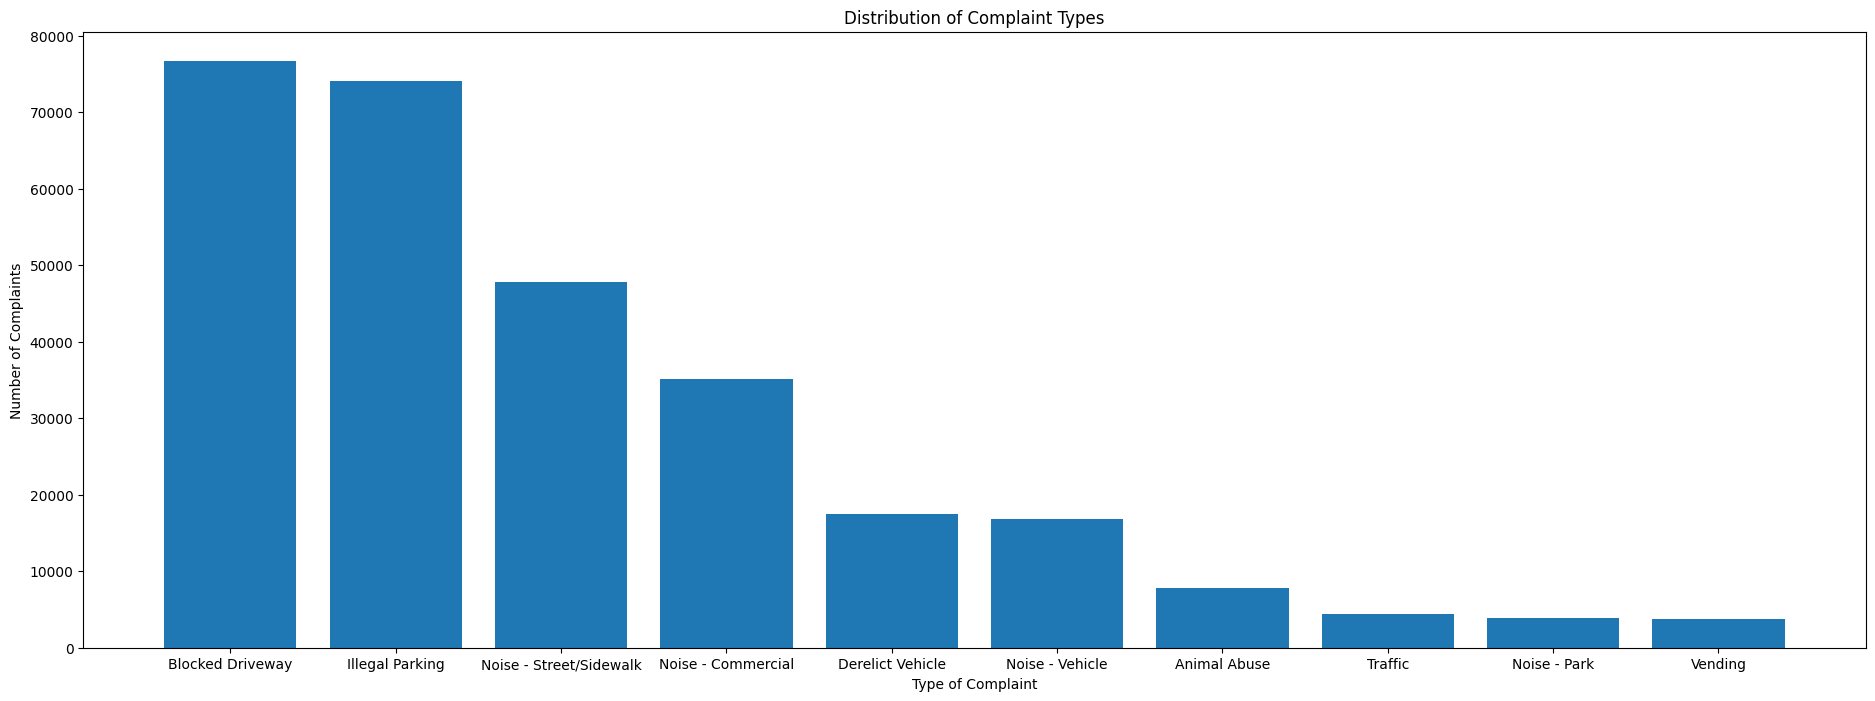

In [14]:
# Setting the figure size
plt.figure(figsize=(23, 8))

# Plotting the bar graph
plt.bar(complaint_counts.index, complaint_counts.values)

# Setting the title and labels
plt.title('Distribution of Complaint Types')
plt.xlabel('Type of Complaint')
plt.ylabel('Number of Complaints')

# Showing the Diagram
plt.show()

# 2. Number of Complaints By Borugh

In [15]:
# Getting the amount of complains in each Borough
borough_counts = df['Borough'].value_counts()
borough_counts

Borough
BROOKLYN         96858
QUEENS           79790
MANHATTAN        62033
BRONX            40217
STATEN ISLAND    12209
Name: count, dtype: int64

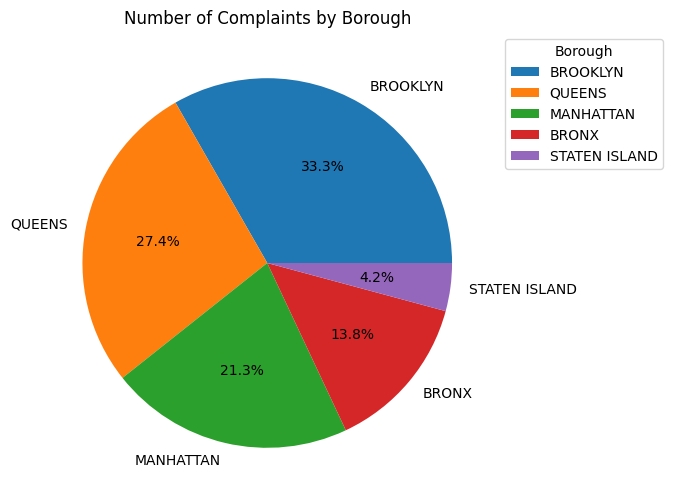

In [16]:
# Creating Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%')

# Setting the title and legend
plt.title('Number of Complaints by Borough')
plt.legend(title='Borough', bbox_to_anchor=(1,1), loc='best')

# Showing the Diagram
plt.show()

# 3. Scatter Diagram of Longitude vs Latitude

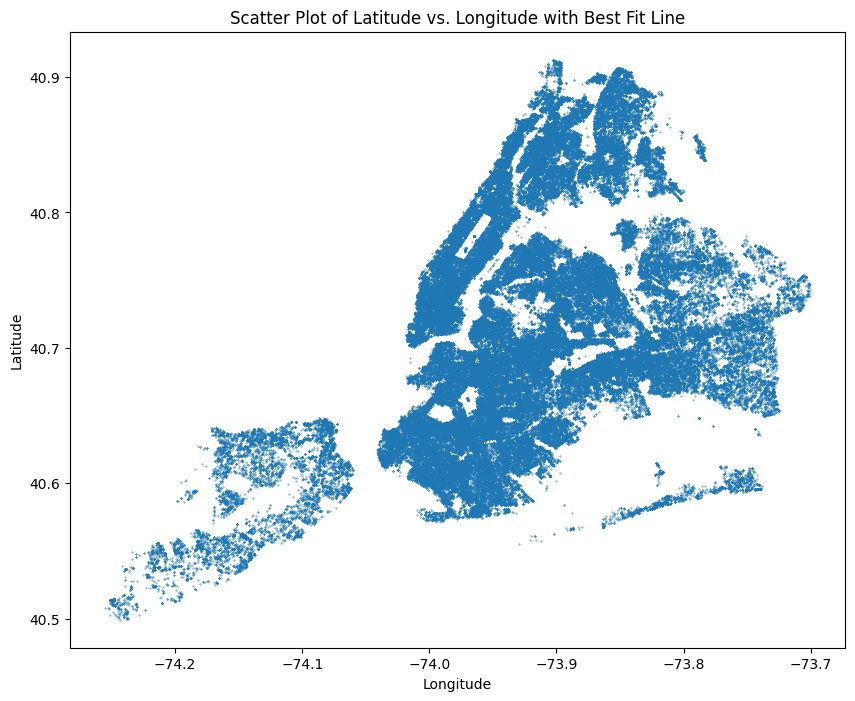

In [17]:
# Scatter Plot 
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=0.1)

# Setting the title and labels
plt.title('Scatter Plot of Latitude vs. Longitude with Best Fit Line')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Showing the Diagram
plt.show()

# 4. Average closing time by location type

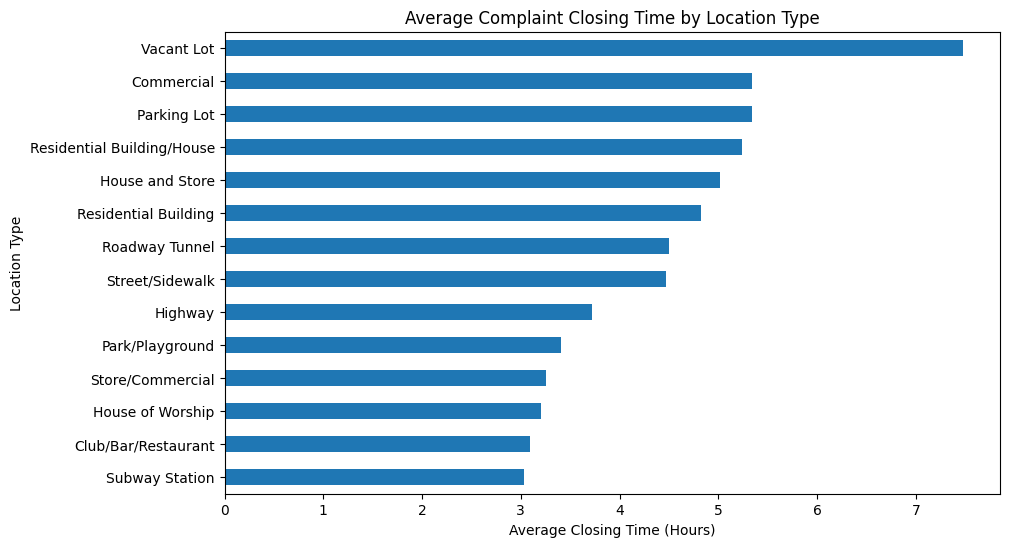

In [18]:
# Calculate the average closing time for each Location Type
avg_closing_time_by_location = df.groupby('Location Type')['Request_Closing_Time'].mean().sort_values()

# Plotting the average closing time
plt.figure(figsize=(10, 6))
avg_closing_time_by_location.plot(kind='barh')

# Setting Titles and Labels
plt.title('Average Complaint Closing Time by Location Type')
plt.xlabel('Average Closing Time (Hours)')
plt.ylabel('Location Type')

# Showing the Diagram
plt.show()

In [19]:
# Checking the actual values
avg_closing_time_by_location

Location Type
Subway Station                3.035606
Club/Bar/Restaurant           3.094161
House of Worship              3.199755
Store/Commercial              3.255151
Park/Playground               3.410836
Highway                       3.725675
Street/Sidewalk               4.475089
Roadway Tunnel                4.498685
Residential Building          4.826071
House and Store               5.013262
Residential Building/House    5.239021
Parking Lot                   5.339744
Commercial                    5.342769
Vacant Lot                    7.473925
Name: Request_Closing_Time, dtype: float64

# 5. Total Complaints Over Time in Months

In [20]:
# Resample by a time unit month and count the number of complaints
complaints_over_time = df.set_index('Created Date').resample('ME').size()
complaints_over_time

Created Date
2015-03-31     2411
2015-04-30    26638
2015-05-31    35220
2015-06-30    34289
2015-07-31    33231
2015-08-31    33663
2015-09-30    34149
2015-10-31    31689
2015-11-30    30009
2015-12-31    29808
Freq: ME, dtype: int64

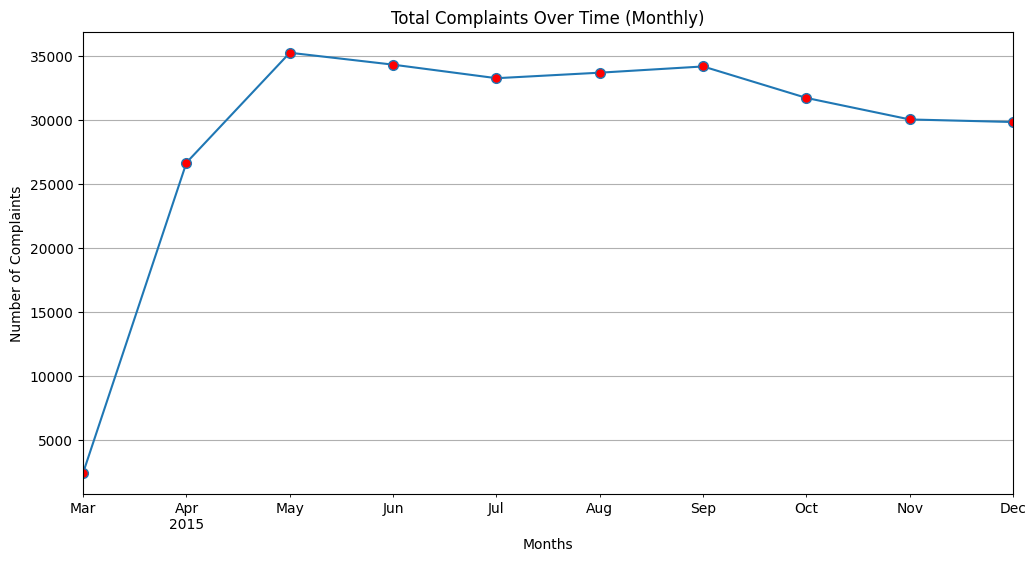

In [21]:
# Setting figure size
plt.figure(figsize=(12, 6))

# Plotting
complaints_over_time.plot(marker='o',mfc='red', markersize=7)

# Putting the title and labels
plt.title('Total Complaints Over Time (Monthly)')
plt.xlabel('Months')
plt.ylabel('Number of Complaints')

# Showing the grid
plt.grid(True)

# Showing the Diagram
plt.show()

# 6. Complain Types arranged according to their Average Reqest Closing Time categorized by Borough

In [22]:
# Arranging complain types according to their Average Reqest Closing Time categorized by Borough
# Group by complaint and borough, get mean closing time
grouped_data = df.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean()
pd.set_option('display.max_rows', 80)

# Print the result
print(grouped_data)

Complaint Type            Borough      
Animal Abuse              BRONX            7.336244
                          BROOKLYN         4.834937
                          MANHATTAN        3.692147
                          QUEENS           5.416872
                          STATEN ISLAND    4.969506
Blocked Driveway          BRONX            6.262117
                          BROOKLYN         4.410120
                          MANHATTAN        3.557508
                          QUEENS           4.537234
                          STATEN ISLAND    4.070366
Derelict Vehicle          BRONX            9.211905
                          BROOKLYN         5.951302
                          MANHATTAN        4.272054
                          QUEENS           8.491719
                          STATEN ISLAND    5.040597
Disorderly Youth          BRONX            4.238408
                          BROOKLYN         4.150517
                          MANHATTAN        2.433807
                        

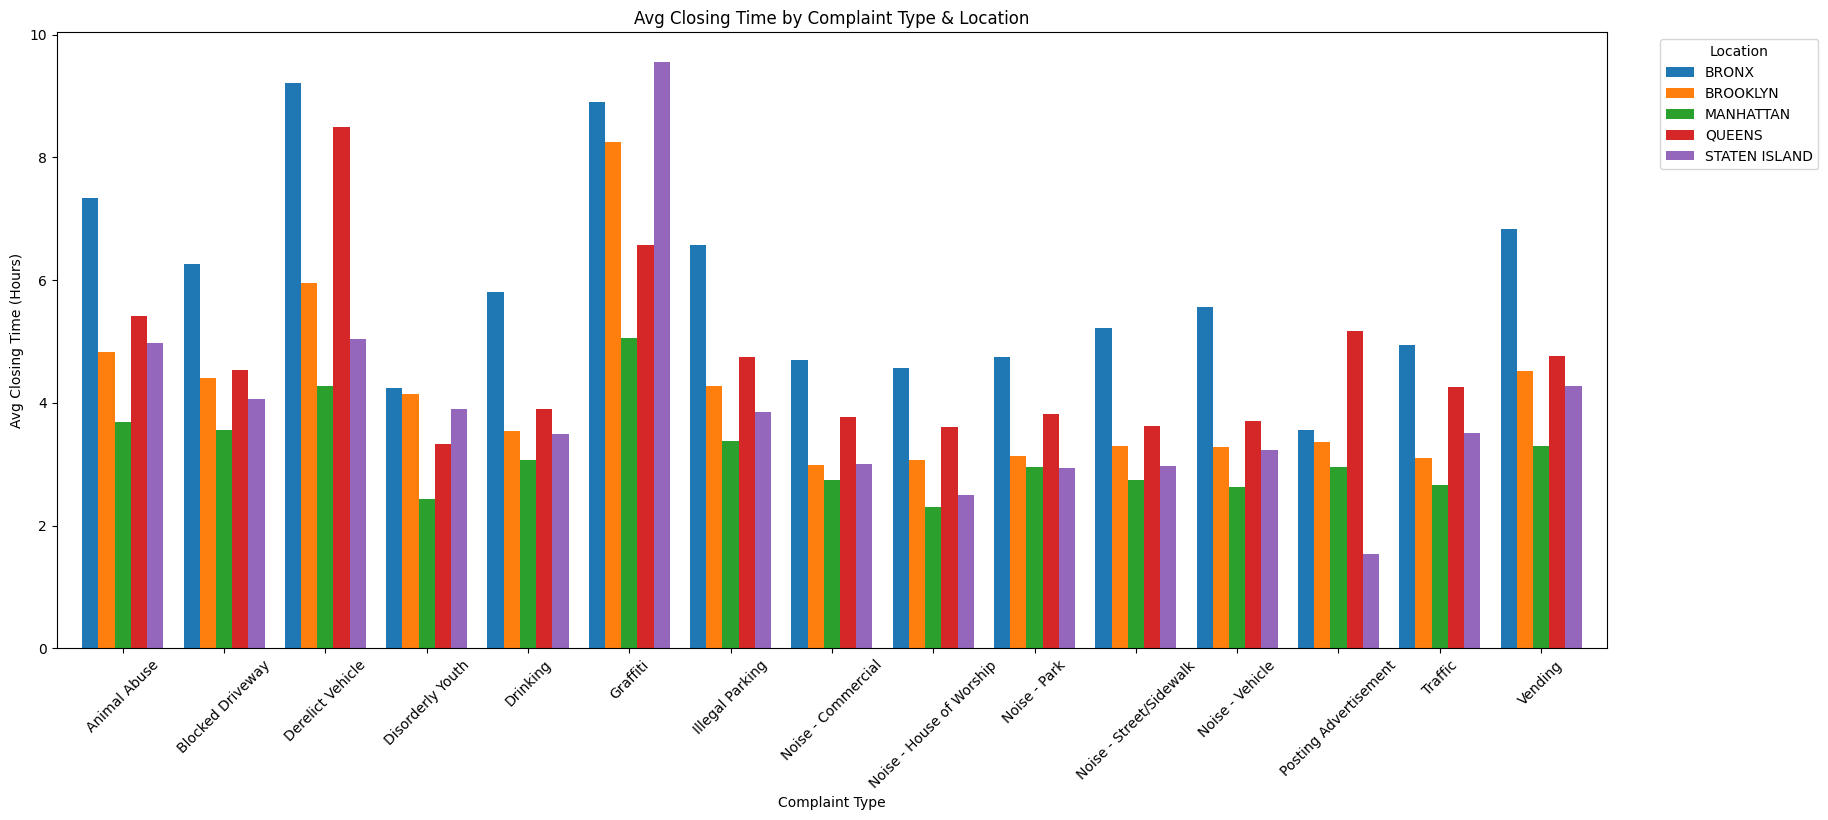

In [23]:
# Reshape data using unstack
grouped_data_reshaped = grouped_data.unstack()

# Plot the bar graph
grouped_data_reshaped.plot(kind='bar', figsize=(20, 8), width=0.8)

# Put Labels and titles
plt.title('Avg Closing Time by Complaint Type & Location')
plt.xlabel('Complaint Type')
plt.ylabel('Avg Closing Time (Hours)')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.03, 1), loc='upper left')

# Show the Diagram
plt.show()

# Statistical Testing

# Test 1: Whether the average response time across complaint types is similar or not.

In [24]:
# Importing the f one way test
from scipy.stats import f_oneway

# H0: The average response time is the same across all complaint types.
# H1: At least one complaint type has a different average response time than the others.

# Performing one-way ANOVA test
grouped_data = df.groupby('Complaint Type')['Request_Closing_Time'].apply(list)
f_statistic, p_value = f_oneway(*grouped_data)

# Outputting the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Rejecting the Null Hypothesis (H0). There is a statistically significant difference in average response time across complaint types.")
else:
    print("Accepting the Null Hypothesis (H0). There is no statistically significant difference in average response time across complaint types.")

F-statistic: 578.9120337398356
P-value: 0.0
Rejecting the Null Hypothesis (H0). There is a statistically significant difference in average response time across complaint types.


# Test 2: Whether the type of complaint or service requested and location are related.

In [25]:
# Importing the f onw way test
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Complaint Type'], df['Borough'])

# H0: Type of Complaint and Location are not related
# H1: Type of Complaint and Location are related

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Outputting the results
print("Chi-square statistic:", chi2) 
print("P-value:", p)
print("Degrees of freedom:", dof)

# Interpretation
if p < 0.05:
    print("Reject the Null Hypothesis (H0). There is a significant association between Complaint Type and Location.")
else:
    print("Fail to reject the Null Hypothesis (H0). There is no significant association between Complaint Type and Location.")

Chi-square statistic: 73264.62164334783
P-value: 0.0
Degrees of freedom: 56
Reject the Null Hypothesis (H0). There is a significant association between Complaint Type and Location.


# Creating a ML model to predict the request closing time

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [27]:
# Drop rows with negative response time
df = df[(df['Longitude'] != 0) & (df['Latitude'] != 0)]
df = df[(df['Request_Closing_Time'] >= 0) & (df['Request_Closing_Time'] <= 20)]

In [28]:
# Selecting features (X) and targets (y)
# Filter only top complaint types to limit one-hot explosion
top_complaints = df['Complaint Type'].value_counts().nlargest(10).index
df = df[df['Complaint Type'].isin(top_complaints)]
df = df[df['Borough'] != 'Unspecified']

# One-hot encoding
categorical = pd.get_dummies(df[['Borough', 'Complaint Type', 'Agency']], drop_first=True)
numerical = df[['Longitude', 'Latitude']]

In [29]:
X = pd.concat([categorical, numerical], axis=1)

y = df['Request_Closing_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train the model
rf = RandomForestRegressor(n_estimators=120, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [32]:
# Predict
y_pred = rf.predict(X_test)
print (y_pred)

[ 6.36609072 15.97851379 11.15616994 ...  5.88735733  2.59068818
  2.38688143]


In [33]:
# Evaluate the model
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

MAE: 2.5470
MSE: 12.4749
RMSE: 3.5320


In [34]:
y_pred

array([ 6.36609072, 15.97851379, 11.15616994, ...,  5.88735733,
        2.59068818,  2.38688143], shape=(56498,))

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [120,140,150],
    'max_depth': [2, 5, 10, 12],
    'min_samples_split': [9, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 12, 'min_samples_split': 9, 'n_estimators': 140}


In [48]:
# Train model with best hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=140,
    max_depth=12,
    min_samples_split=9,
    random_state=42
)

best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_split=9, n_estimators=140,
                      random_state=42)

In [49]:
y_pred = best_rf.predict(X_test)

In [50]:
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f} hours")

MSE: 10.7734
RMSE: 3.2823
MAE: 2.4246 hours


In [51]:
def predict_response_time(borough, complaint_type, agency, longitude, latitude):
    # Prepare raw input
    new_data = pd.DataFrame([{
        'Borough': borough,
        'Complaint Type': complaint_type,
        'Agency': agency,
        'Longitude': longitude,
        'Latitude': latitude
    }])

    # One-hot encode using training columns
    cat_input = pd.get_dummies(new_data[['Borough', 'Complaint Type', 'Agency']])
    all_cats = pd.get_dummies(df[['Borough', 'Complaint Type', 'Agency']], drop_first=True).columns
    cat_input = cat_input.reindex(columns=all_cats, fill_value=0)

    # Add numerical
    cat_input['Longitude'] = longitude
    cat_input['Latitude'] = latitude

    # Predict
    prediction = best_rf.predict(cat_input)[0]
    print(f"📌 Predicted Response Time: {prediction:.2f} hours")
    return prediction


In [52]:
# Predict
predict_response_time('BROOKLYN', 'Illegal Parking', 'NYPD', -73.9442, 40.6782)


📌 Predicted Response Time: 3.63 hours


np.float64(3.6336331894040086)